# ANALYSIS - 5

# HOST ANALYSIS & RECOMMENDATION SYSTEM FOR PRICES


In [1]:
# Cleaning the data

import pandas as pd
import numpy as np
from collections import Counter

inputDF = pd.read_csv('../data/listings.csv')
inputDF=inputDF[['id','instant_bookable','room_type','host_since','accommodates','bathrooms','bedrooms','beds','amenities','cancellation_policy','review_scores_rating','price']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.accommodates  > 0]

for i,r in inputDF.iterrows():
    inputDF.set_value(i,'year',r['host_since'][:4])
    inputDF.set_value(i,'month',r['host_since'][5:7])
    inputDF.set_value(i,'day',r['host_since'][8:])
inputDF.head()

d:\python\python install\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
d:\python\python install\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
d:\python\python install\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,id,instant_bookable,room_type,host_since,accommodates,bathrooms,bedrooms,beds,amenities,cancellation_policy,review_scores_rating,price,year,month,day
1,3075044,t,Private room,2012-06-07,2,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",moderate,94.0,65.0,2012,06,07
2,6976,f,Private room,2009-05-11,2,1.0,1.0,1.0,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",moderate,98.0,65.0,2009,05,11
3,1436513,f,Private room,2013-04-21,4,1.0,1.0,2.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",moderate,100.0,75.0,2013,04,21
4,7651065,f,Private room,2014-05-11,2,1.5,1.0,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",flexible,99.0,79.0,2014,05,11
5,12386020,f,Private room,2016-03-23,2,1.0,1.0,1.0,"{""Cable TV"",""Wireless Internet"",""Air Condition...",flexible,100.0,75.0,2016,03,23


Text(0, 0.5, 'number of hosts')

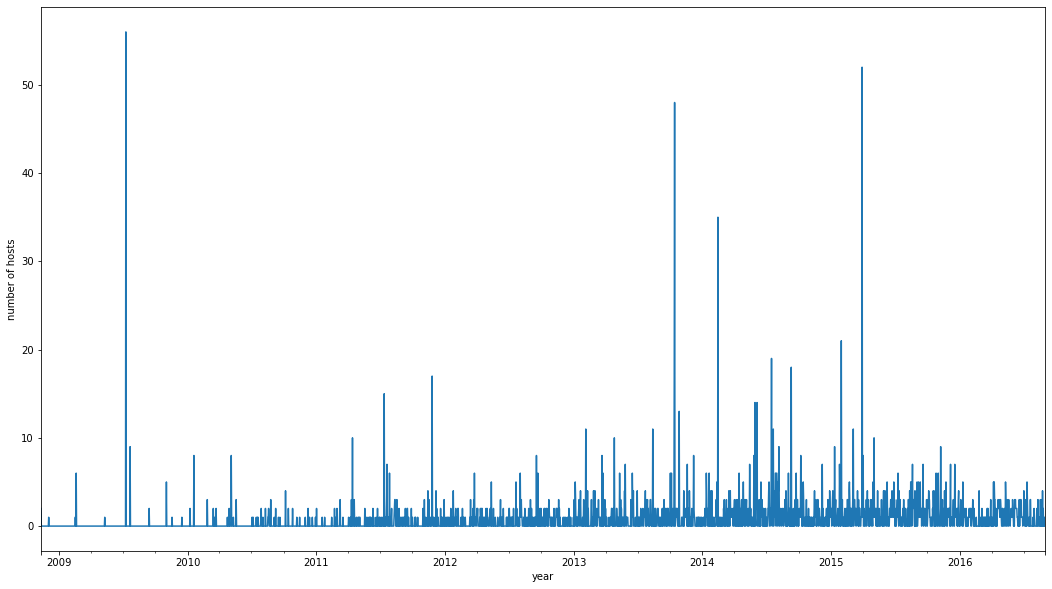

In [2]:
# this graph shows count of host registered everyday by resampling the data for each day

import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
join_dates = pd.to_datetime(inputDF['host_since']).value_counts().resample('D').mean().fillna(0)
join_dates.plot()
plt.xlabel('year')
plt.ylabel('number of hosts')

Text(0, 0.5, 'Number of hosts')

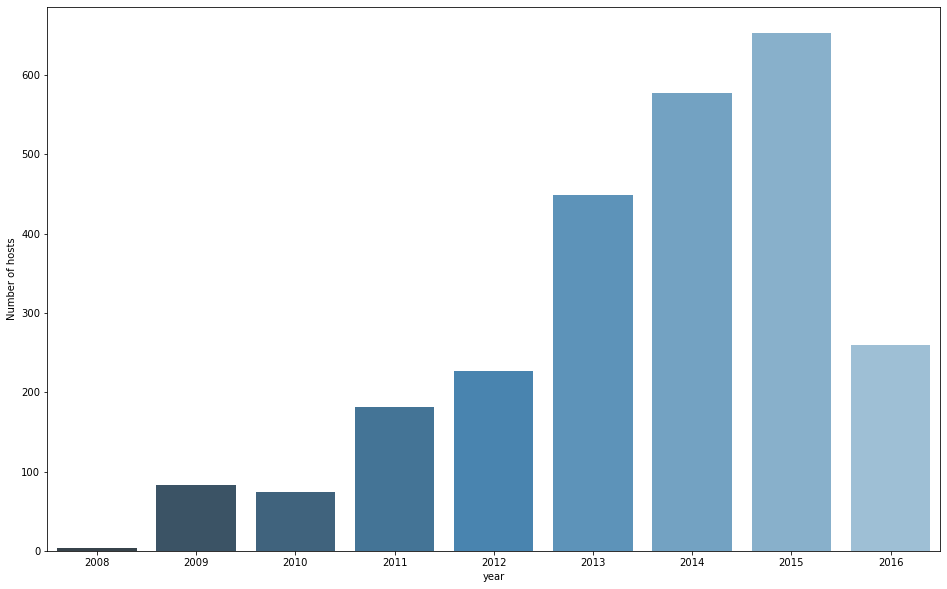

In [3]:
plt.figure(figsize=(16,10))
yearDF=inputDF.groupby(['year']).id.count()
yearDF=yearDF.reset_index()
yearDF=yearDF.rename(columns={'id':'Number of hosts'})
ax = sns.barplot(x='year', y="Number of hosts", data=yearDF,palette="Blues_d")
plt.ylabel('Number of hosts')

d:\python\python install\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


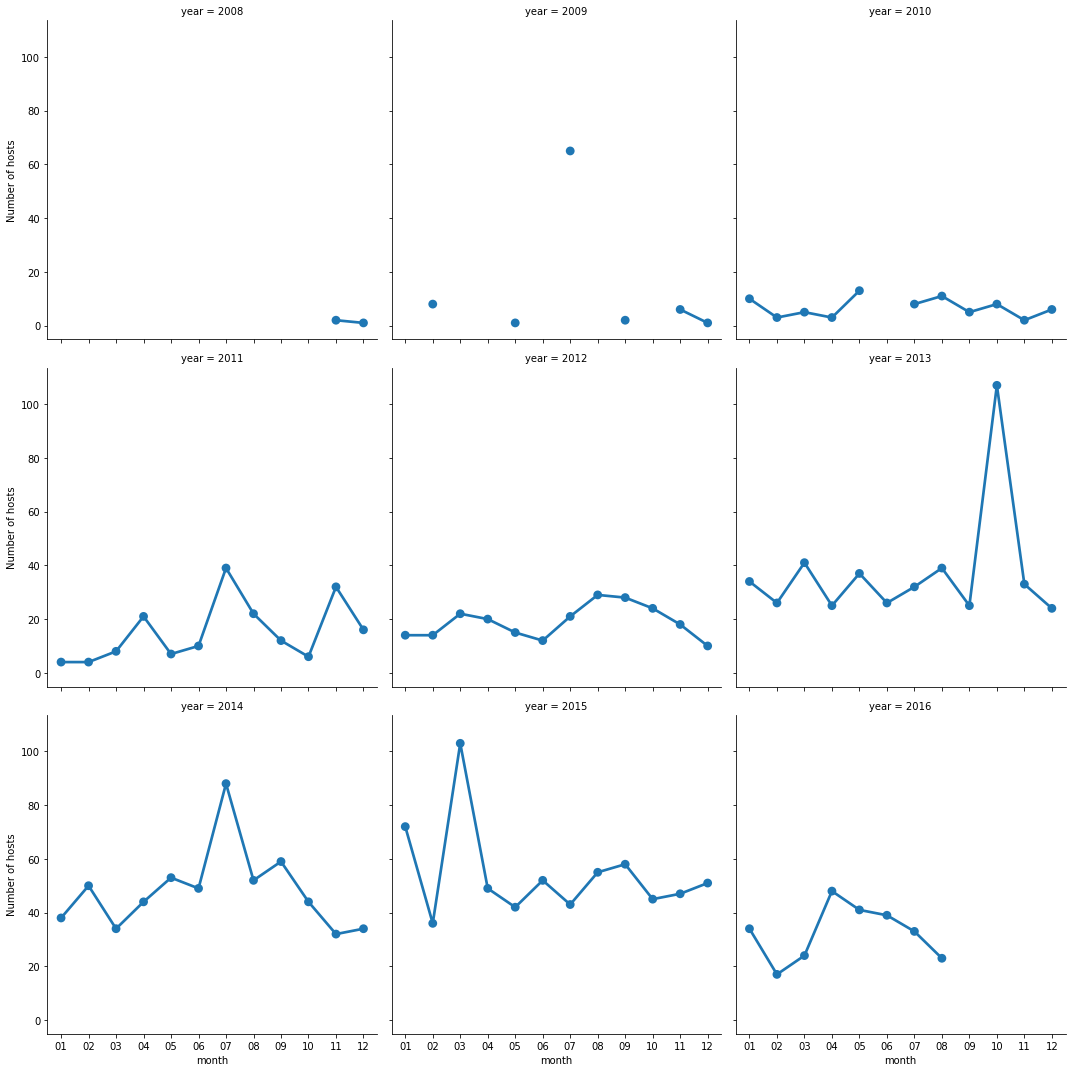

In [5]:
import seaborn as sns

yearMonth=inputDF.groupby(['year','month']).id.count()
yearMonth=yearMonth.reset_index()
yearMonth=yearMonth.sort_values(['year','month'],ascending=[1,1])
yearMonth=yearMonth.rename(columns={"id":"Number of hosts"})
sns.factorplot(data=yearMonth, x="month", y="Number of hosts",col="year",col_wrap=3) 


#大多数房东选择在7，11月注册，接下来分析房东们是否更愿意在周末注册

Text(0, 0.5, 'Number of hosts')

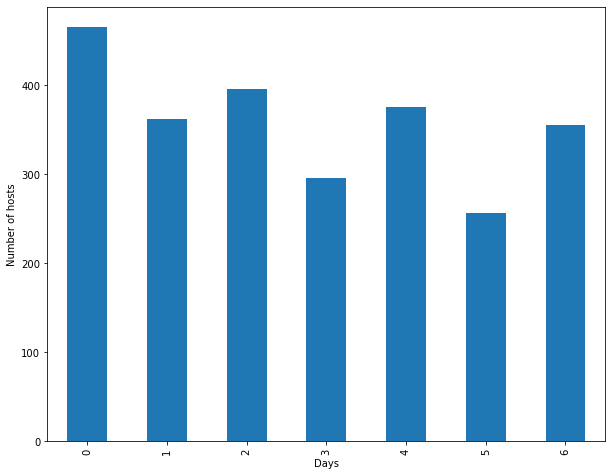

In [6]:
plt.figure(figsize=(10,8))
pd.to_datetime(inputDF['host_since']).dt.dayofweek.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Days")
plt.ylabel("Number of hosts")

#考虑各个因素对价格的影响，对非数值变量如cancellation_policy，instant_booking进行处理，转化为数值变量

In [7]:
#this will create 4 columns namely flexible, moderate, strict, super_strict_30 which are its categories

cancel_policy = pd.get_dummies(inputDF.cancellation_policy).astype(int)
cancel_policy.head()

,flexible,moderate,strict,super_strict_30
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
5,1,0,0,0


In [8]:
# Similiarly converting remaining categorial column,instant_booking  into indiactor variables

instant_booking = pd.get_dummies(inputDF.instant_bookable, prefix = 'instant_booking').astype(int)
instant_booking.head()

,instant_booking_f,instant_booking_t
1,0,1
2,1,0
3,1,0
4,1,0
5,1,0


In [9]:
room_type = pd.get_dummies(inputDF.room_type).astype(int)
room_type.head()

,Entire home/apt,Private room,Shared room
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0


In [10]:
# drop original columns and replace them with indicator columns

inputDF = inputDF.drop(['cancellation_policy', 'instant_bookable', 'room_type'], axis = 1)
inputDF = pd.concat((inputDF, cancel_policy, instant_booking, room_type), axis = 1)

inputDF.head()

,id,host_since,accommodates,bathrooms,bedrooms,beds,amenities,review_scores_rating,price,year,...,day,flexible,moderate,strict,super_strict_30,instant_booking_f,instant_booking_t,Entire home/apt,Private room,Shared room
1,3075044,2012-06-07,2,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",94.0,65.0,2012,...,07,0,1,0,0,0,1,0,1,0
2,6976,2009-05-11,2,1.0,1.0,1.0,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",98.0,65.0,2009,...,11,0,1,0,0,1,0,0,1,0
3,1436513,2013-04-21,4,1.0,1.0,2.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",100.0,75.0,2013,...,21,0,1,0,0,1,0,0,1,0
4,7651065,2014-05-11,2,1.5,1.0,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",99.0,79.0,2014,...,11,1,0,0,0,1,0,0,1,0
5,12386020,2016-03-23,2,1.0,1.0,1.0,"{""Cable TV"",""Wireless Internet"",""Air Condition...",100.0,75.0,2016,...,23,1,0,0,0,1,0,0,1,0


In [11]:
# splitting the amenities list to count the number of amenities
amenities_list = []

for element in inputDF.amenities:
    element = element[1:]
    element = element[:-1]
    x = element.split()
    amenities_list.append(len(x))

inputDF.amenities = amenities_list
inputDF=inputDF.drop(['host_since'],axis=1)
inputDF.head()

,id,accommodates,bathrooms,bedrooms,beds,amenities,review_scores_rating,price,year,month,day,flexible,moderate,strict,super_strict_30,instant_booking_f,instant_booking_t,Entire home/apt,Private room,Shared room
1,3075044,2,1.0,1.0,1.0,17,94.0,65.0,2012,06,07,0,1,0,0,0,1,0,1,0
2,6976,2,1.0,1.0,1.0,20,98.0,65.0,2009,05,11,0,1,0,0,1,0,0,1,0
3,1436513,4,1.0,1.0,2.0,17,100.0,75.0,2013,04,21,0,1,0,0,1,0,0,1,0
4,7651065,2,1.5,1.0,2.0,9,99.0,79.0,2014,05,11,1,0,0,0,1,0,0,1,0
5,12386020,2,1.0,1.0,1.0,15,100.0,75.0,2016,03,23,1,0,0,0,1,0,0,1,0


In [12]:
##切分训练集和测试集
#import sklearn.metrics as metrics
#from sklearn.grid_search import GridSearchCV
#from sklearn.grid_search import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model, metrics


split_data= inputDF.drop(['price'],axis=1)
train1,test1,train2,test2=train_test_split(split_data,inputDF.price, test_size=0.4,train_size = 0.6,random_state=13)

In [13]:
# Lets analyze if linear regression can predict the prices accurately
# mean of prices
mean = np.mean(inputDF.price)

# standard deviation to compare 
std = np.std(inputDF.price)

print("mean: " + str(mean))
print ("standard deviation: " + str(std))

mean: 168.4856344772546
standard deviation: 117.4765296945169


Linear Regression: 34.35077973783336
Coefficients: 
 [-1.77332660e-06  7.88796928e+00  3.67597879e+01  2.72903358e+01
  5.48765655e+00  9.03091973e-01  7.47931302e-01  4.58584333e+00
  8.69956455e-01 -1.42243106e-01 -2.83765632e+01 -2.19137751e+01
 -2.54845755e+01  7.57749138e+01  6.21099515e+00 -6.21099515e+00
  6.82553870e+01 -2.64931891e+01 -4.17621978e+01]
Variance score: 0.5767463453171999


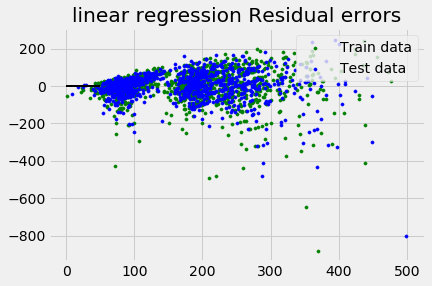

In [79]:
# linear regression testing
linear_reg = linear_model.LinearRegression()
linear_reg.fit(train1, train2)
linear_reg_error = metrics.median_absolute_error(test2, linear_reg.predict(test1))
print ("Linear Regression: " + str(linear_reg_error))
# regression coefficients
print('Coefficients: \n', linear_reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(linear_reg.score(test1, test2)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(linear_reg.predict(train1), linear_reg.predict(train1) - train2,
			color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(linear_reg.predict(test1), linear_reg.predict(test1) - test2,
			color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("linear regression Residual errors")

## function to show plot
plt.show()

Rigde_Linear Regression: 34.34221939660347
Coefficients: 
 [-1.77338530e-06  7.95624783e+00  3.66643890e+01  2.72901504e+01
  5.44363620e+00  8.94739225e-01  7.47624027e-01  4.48821664e+00
  8.62255577e-01 -1.47550173e-01 -2.74950519e+01 -2.10716080e+01
 -2.46621118e+01  7.32287717e+01  6.20537024e+00 -6.20537024e+00
  6.77325029e+01 -2.68670141e+01 -4.08654888e+01]
Variance score: 0.5768952101108253


d:\python\python install\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.50683e-17): result may not be accurate.
  overwrite_a=True).T


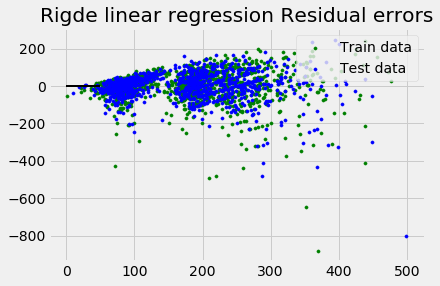

In [78]:
#Rigde linear regression testing
from sklearn.linear_model import Ridge
model= Ridge(alpha=1)
model.fit(train1,train2)
rigde_linear_reg_error = metrics.median_absolute_error(test2, model.predict(test1))
print ("Rigde_Linear Regression: " + str(rigde_linear_reg_error))
# regression coefficients
print('Coefficients: \n', model.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(test1, test2)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(model.predict(train1), model.predict(train1) - train2,
			color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(model.predict(test1), model.predict(test1) - test2,
			color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Rigde linear regression Residual errors")

## function to show plot
plt.show()

Lasso_Linear Regression: 36.251902103484554
Coefficients: 
 [-1.71609730e-06  9.60951118e+00  3.31121277e+01  2.62748090e+01
  3.95530554e+00  7.40160794e-01  7.51098383e-01  1.84630527e+00
  5.99103618e-01 -2.48708744e-01 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.97468076e+01  6.00528275e+00 -0.00000000e+00
  9.16817040e+01 -0.00000000e+00 -0.00000000e+00]
Variance score: 0.56516864935726


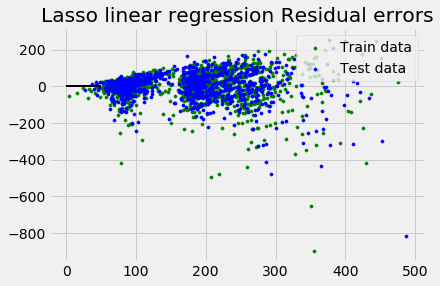

In [82]:
#lasso linear regression testing
from sklearn.linear_model import Lasso
model= Lasso(alpha=1)
model.fit(train1,train2)
lasso_linear_reg_error = metrics.median_absolute_error(test2, model.predict(test1))
print ("Lasso_Linear Regression: " + str(lasso_linear_reg_error))
# regression coefficients
print('Coefficients: \n', model.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(test1, test2)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(model.predict(train1), model.predict(train1) - train2,
			color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(model.predict(test1), model.predict(test1) - test2,
			color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Lasso linear regression Residual errors")

## function to show plot
plt.show()

poly_Linear Regression: 34.07044257583766
Coefficients: 
 [-4.10631465e+01  3.88862604e-01  6.30945734e-03 -1.13696372e-01
  4.67679589e-03  7.52897195e-03 -1.74128786e-01  3.18508167e-01
  2.28374791e-03  6.07300157e-02 -1.00691724e-01  8.05334293e-03
  1.00281835e-03 -7.87761097e-03  1.21200673e-03 -4.84562385e-03
  9.31329161e-03  7.85324823e-03 -1.72086639e-02 -1.74407000e-02
 -1.10860973e-13  1.59278366e-07  9.62180657e-07  7.70515029e-07
 -2.14570561e-06 -6.14754076e-08  1.57182368e-07  7.97335485e-08
  1.49640873e-07  4.72514688e-08 -8.97780088e-02 -8.97755073e-02
 -8.97786775e-02 -8.97800139e-02 -1.79556307e-01 -1.79556100e-01
 -1.19703495e-01 -1.19705080e-01 -1.19704085e-01 -6.55427139e+00
 -1.14706573e+00  1.54857020e+00  1.39902112e+01 -3.29005995e-01
  8.24166171e-02  1.63540225e-02 -1.65106245e-01 -2.30230545e-02
 -7.14989819e+00 -1.57214698e+00 -7.40520452e+00  1.61337263e+01
 -4.24333626e+00  4.24981291e+00  6.65571864e+00  2.87557816e+00
 -9.52482015e+00  2.78610109e+00

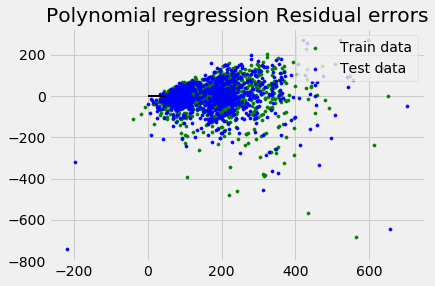

In [95]:
##Polynomial regression testing
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(train1)
model= linear_model.LinearRegression()
model.fit(X_poly, train2)
test_poly=poly_reg.fit_transform(test1)
poly_reg_error = metrics.median_absolute_error(test2, model.predict(test_poly))
print ("poly_Linear Regression: " + str(poly_reg_error))
# regression coefficients
print('Coefficients: \n', model.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(test_poly, test2)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(model.predict(X_poly), model.predict(X_poly) - train2,
			color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(model.predict(test_poly), model.predict(test_poly) - test2,
			color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Polynomial regression Residual errors")

## function to show plot
plt.show()

ElasticNet Regression: 42.01092972722799
Coefficients: 
 [-1.73548569e-06  1.83374261e+01  1.50133213e+01  1.63327022e+01
  5.77875908e+00  3.14146866e-01  8.74818852e-01  4.49235160e-02
  3.70279639e-01 -3.84993160e-01 -2.46476106e+00 -0.00000000e+00
 -0.00000000e+00  3.07584588e+00  2.87047859e+00 -2.87047856e+00
  2.62102682e+01 -2.25009927e+01 -1.37594272e+00]
Variance score: 0.51024633018741


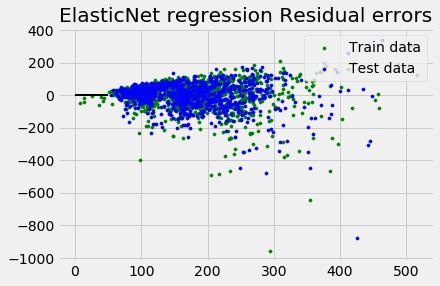

In [99]:
#ElasticNet Regression testing
from sklearn import linear_model
model= linear_model.ElasticNet(l1_ratio=0.7)
model.fit(train1,train2)
enet_reg_error = metrics.median_absolute_error(test2, model.predict(test1))
print ("ElasticNet Regression: " + str(enet_reg_error))
# regression coefficients
print('Coefficients: \n', model.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(test1, test2)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(model.predict(train1), model.predict(train1) - train2,
			color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(model.predict(test1), model.predict(test1) - test2,
			color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("ElasticNet regression Residual errors")

## function to show plot
plt.show()

Decision Tree Regression: 34.786885245901644
Variance score: 0.5444245742799942


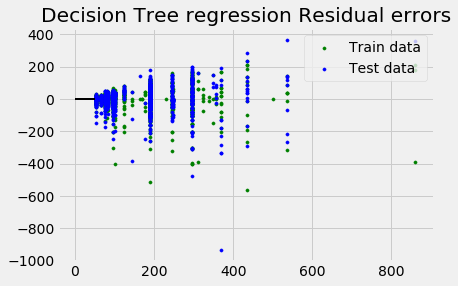

In [102]:
#Decision Tree regression testing
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Fit regression model
model = DecisionTreeRegressor(max_depth=5)
model.fit(train1, train2)
decisiontree_reg_error = metrics.median_absolute_error(test2, model.predict(test1))
print ("Decision Tree Regression: " + str(decisiontree_reg_error))
# regression coefficients
#print('Coefficients: \n', model.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(test1, test2)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(model.predict(train1), model.predict(train1) - train2,
			color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(model.predict(test1), model.predict(test1) - test2,
			color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Decision Tree regression Residual errors")

## function to show plot
plt.show()

d:\python\python install\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\python\python install\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression: 94.0
Coefficients: 
 [[ 6.03671191e-08 -8.11303783e-06 -2.08231554e-06 ... -1.67906497e-06
  -1.73004815e-07 -4.20502830e-08]
 [ 2.15902327e-08 -7.74409266e-06 -2.31782311e-06 ... -1.62869492e-06
  -5.53877981e-07  5.23887990e-07]
 [ 3.04264769e-07 -1.24044481e-05 -3.60642666e-06 ... -2.61037811e-06
   1.79209721e-07 -8.99165547e-08]
 ...
 [-2.77013841e-07 -1.18321858e-06 -2.12803150e-07 ... -5.33825784e-07
  -8.80840713e-07 -2.76716232e-08]
 [-9.24947673e-08 -1.31812054e-06 -1.48665836e-06 ... -7.08680346e-07
  -8.82407630e-07 -2.89808151e-08]
 [ 1.64622697e-07 -3.00201373e-06  1.95964626e-06 ... -3.55225215e-07
  -1.72971375e-06 -7.49037722e-08]]
Variance score: 0.03589232303090728


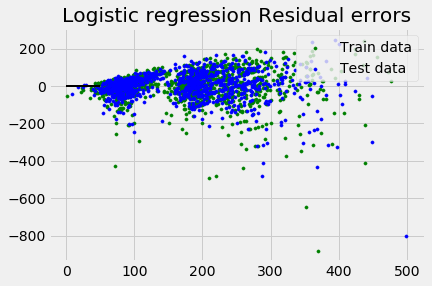

In [104]:
##LogisticRegression Regression testing
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train1, train2)
logistic_reg_error = metrics.median_absolute_error(test2, model.predict(test1))
print ("Logistic Regression: " + str(logistic_reg_error))
# regression coefficients
print('Coefficients: \n', model.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(test1, test2)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(linear_reg.predict(train1), linear_reg.predict(train1) - train2,
			color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(linear_reg.predict(test1), linear_reg.predict(test1) - test2,
			color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Logistic regression Residual errors")

## function to show plot
plt.show()